# Digit Recognizer

<div style='text-align: justify'>Digit Recognizer is a python GUI application that can identify a number in a user generated image. It uses a neural network that was trained on the MNIST dataset, and it does not use any of the popular deep learning frameworks, instead, it uses mlspear. To evaluate how well this application identifies digits, we will create a fully connected neural network from tensorflow 2.x with Keras, and use it as a baseline model for comparison.</div>

In [1]:
import mlspear
import tensorflow as tf

## MNIST Dataset

<div style='text-align: justify'>To speed up the training process for neural networks, we first normalize the mnist dataset by dividing each entry by 255. That way, each instance has all entries between 0 and 1. </div>

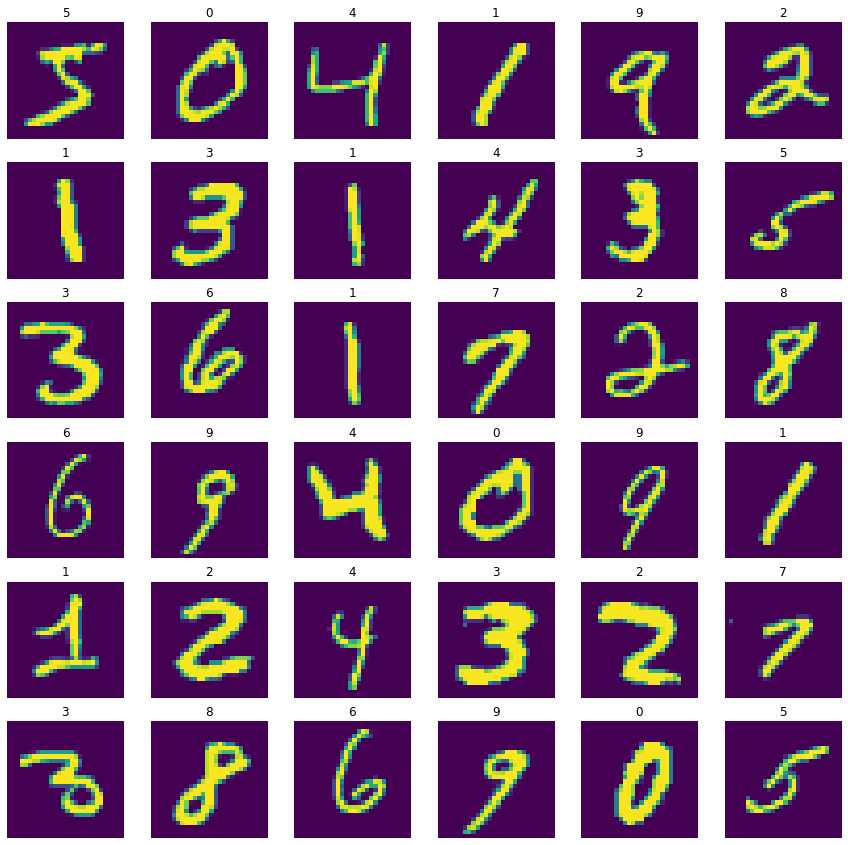

In [2]:
import matplotlib.pyplot as plt
import numpy as np

mnist_dataset = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist_dataset.load_data()
X_train, X_test = X_train / 255, X_test / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_test  = tf.keras.utils.to_categorical(y_test)

fig, axes = plt.subplots(6, 6, figsize = (15, 15))

samples = np.array([
    [0,  1,  2,  3,   4,  5],
    [6,  7,  8,  9,  10, 11],
    [12, 13, 14, 15, 16, 17],
    [18, 19, 20, 21, 22, 23],
    [24, 25, 26, 27, 28, 29],
    [30, 31, 32, 33, 34, 35]
])

for row in range(0, 6):
    for col in range(0, 6):
        current_image = X_train[samples[row, col]]
        axes[row, col].set_title(str(y_train[samples[row, col]].argmax()))
        axes[row, col].axis('off')
        axes[row, col].imshow(current_image)
        
plt.show()

## Creating a Fully Connected Neural Network Classification Model using tensorflow 2.x with keras

In [3]:
tf_model = tf.keras.Sequential()
tf_model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
tf_model.add(tf.keras.layers.Dense(128, activation = 'relu'))
tf_model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

tf_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [4]:
history = tf_model.fit(X_train, y_train, epochs = 5, verbose = 0)

In [5]:
y_predict = tf_model.predict(X_test)
_, tf_model_accuracy = tf_model.evaluate(X_test, y_test, verbose = 0)
print("accuracy: ", tf_model_accuracy)

accuracy:  0.9747


## Defining a Plotting Function for a Confusion Matrix

In [7]:
import pandas as pd
import seaborn as sns
import sklearn.metrics as sk_metrics

def confusion_plot(actuals, predictions):
    test_labels = actuals.argmax(axis = 1)
    pred_labels = predictions.argmax(axis = 1)
    confusion = sk_metrics.confusion_matrix(test_labels, pred_labels)
    confusion = confusion.astype("float") / confusion.sum(axis = 1)
    
    labels = [i for i in "0123456789"]
    df_cm = pd.DataFrame(confusion, index = labels, columns = labels)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    
    plt.figure(figsize = (20, 14))
    sns.set(font_scale = 1.4)
    sns.heatmap(df_cm, cmap = "gray", annot = True, annot_kws = {"size": 16})
    plt.show()

## Confusion Matrix For tf_model

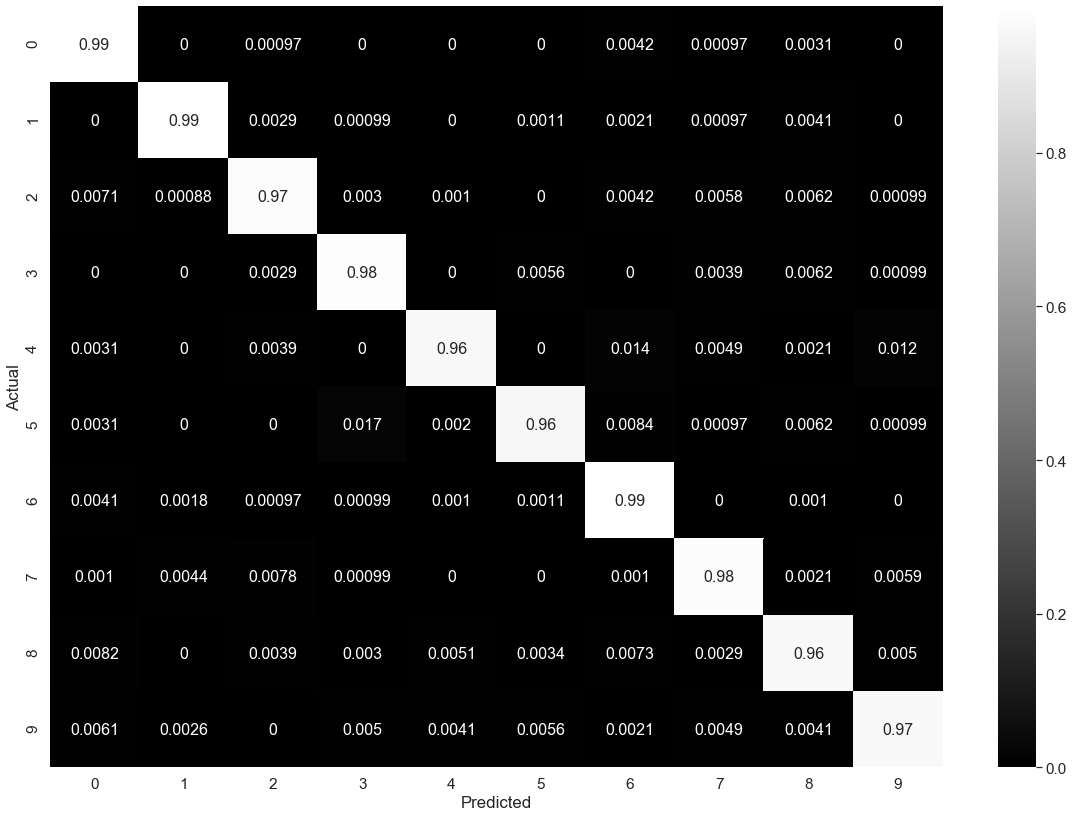

In [8]:
confusion_plot(y_test, y_predict)

## Creating a Fully Connected Neural Network Classification Model using mlspear

In [9]:
mlspear_model = mlspear.NeuralNetwork([
    mlspear.NonOutputLayers.ReLU(28 * 28, 128), 
    mlspear.OutputLayers.Classification(128, 10)
], print_error = False)

X_train, X_test = X_train.reshape((-1, 28 * 28)), X_test.reshape((-1, 28 * 28))

In [10]:
mlspear_model.train(X_train, y_train, 5, 0.001, batch_size = 32, optimizer = 'adam')

Training Progress: 100%|██████████| 5/5 [50:47<00:00, 609.46s/it]


In [11]:
y_predict = mlspear_model.predict(X_test)
mlspear_accuracy = mlspear.mlf.accuracy(y_predict, y_test)
print("accuracy: ", mlspear_accuracy)

accuracy:  0.964


## Confusion Matrix For mlspear_model

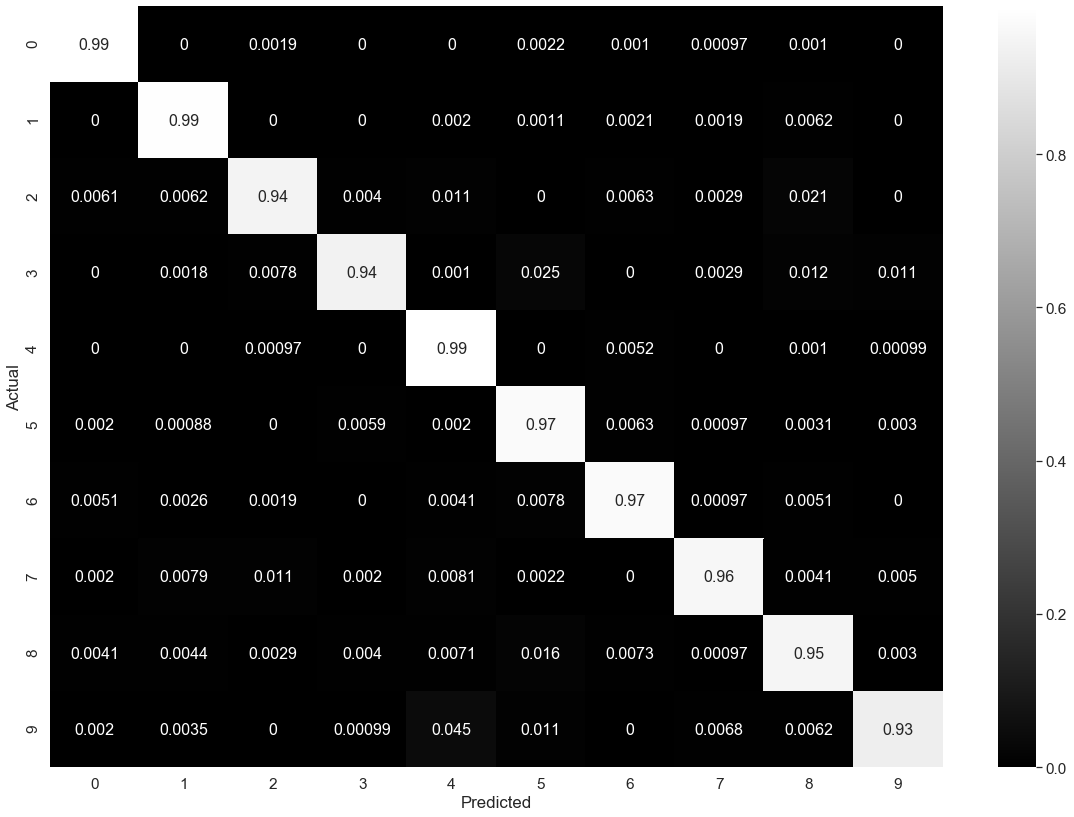

In [12]:
confusion_plot(y_test, y_predict)